In [1]:
# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py
import scipy
from PIL import Image

# no.of.trees for Random Forests
num_trees = 100

# bins for histogram
bins = 8

# train_test_split size
test_size = 0.20

# seed for reproducing same results
seed = 9

In [2]:
#import tensorflow as tf
#print ("TensorFlow version: " + tf.__version__)
# Note you no longer need to import keras, use tf.keras instead
#import keras

In [3]:
#!pwd
#!ls
#import os
#os.chdir('Blood count project/WBC TESTING/')
#!ls

#working
#import tarfile
#fname='Main Dataset.tar.gz'
#if (fname.endswith("tar.gz")):
#    tar = tarfile.open(fname, "r:gz")
#    tar.extractall()
#    tar.close()


In [4]:
!pip install opencv-python
!pip install mahotas
!pip install pandas 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [5]:
#!pip install mahotas
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [6]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [7]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

In [8]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    #hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    hist=hist.flatten()
    import numpy as np
    meanss=np.mean(hist)
    stdss=np.std(hist)
    #Combining means and std
    #import numpy as np
    #statss=np.concatenate([meanss,stdss]).flatten()
    stats = np.array([meanss,stdss])
    (means,stds)=cv2.meanStdDev(image)
    #Combining means and std
    import numpy as np
    statss=np.concatenate([means,stds]).flatten()
    result = np.hstack([statss,stats])
    return hist.flatten()


In [12]:
from skimage.feature import hog
from skimage import color
ppc = 16
hog_images = []
hog_features =[]
def hog1(image):
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image=color.rgb2gray(image)
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)
    #hog_images.append(hog_image)
    hog_features.append(fd)
    return hog_features



In [13]:
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    global_features = []
    y = []

    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            #print("wbc_type ", wbc_type)
            #if wbc_type in ['neut']:
            if wbc_type in ['NEUTROPHIL']:
                label = 'NEUTROPHIL'
            #elif wbc_type in ['eosi']:
            elif wbc_type in ['EOSINOPHIL']:
                label = 'EOSINOPHIL'
            #elif wbc_type in ['lymp']:
            elif wbc_type in ['LYMPHOCYTE']:
                label = 'LYMPHOCYTE'    
            #elif wbc_type in ['mono']:
            elif wbc_type in ['MONOCYTE']:
                label = 'MONOCYTE'
            else:
                continue
            #    label = 'BASOPHIL'
            for image_filename in os.listdir(folder + wbc_type):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                
                if img_file is not None:
                    # Downsample the image to 120, 160, 3
                    #img_file=skimage.transform.resize(arr=img_file, size=(240, 320, 3))
                    img_file=np.array(Image.fromarray(img_file).resize( size=(64, 64)))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(64, 64, 3))
                    #img_arr = np.asarray(img_file)
                    #X.append(img_arr)
                    
                    ####################################
                    # Global Feature extraction
                    ####################################
                    fv_hu_moments = fd_hu_moments(img_file)
                    fv_haralick   = fd_haralick(img_file)
                    fv_histogram  = fd_histogram(img_file)
                
                    hog_features1 = np.array(hog1(img_file))
                    ###################################
                    # Concatenate global features
                    ###################################
                    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
                    #global_feature = np.hstack([ hog_features1])
                    global_features.append(global_feature)
                    y.append(label)
    global_features = np.asarray(global_features)
    y = np.asarray(y)
    return global_features,y

In [14]:
!ls
#global_features, labels = get_data('/Main_Dataset 2/')
global_features, labels = get_data('/home/sandeep/Sandeep/Python_bloodTest/blood_count/code/clould_code/Main_Dataset2/')

#X_test, y_test = get_data('/home/kashish/Documents/Blood_count_debraj_sir/images/TEST_SIMPLE/')
print(global_features.shape)
print(type(global_features))
#print(X_test.shape)
print(labels.shape)
print(global_features)
print(labels)


Baso		   labels.h5		   Testing data
basotest.bmp	   lymtest.bmp		   test.png
bloodcountprog.py  Main_Dataset2	   testsandeep.png
contoured111.jpg   Main_Dataset2.zip	   Untitled Folder
contoured1.jpg	   monotest.bmp		   Untitled Folder 2
data.h5		   neuttest.bmp		   WBC_classification.ipynb
esotest.bmp	   scaler.save		   WBC_model_keras.h5
keras-mlp.csv	   Segmentation_RBC.ipynb  WBC_model_wieghts.h5


/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


(9957, 532)
<class 'numpy.ndarray'>
(9957,)
[[ 3.41474503e-01  1.65764324e-03  6.63057296e-03 ...  4.52461766e-25
   3.20780222e-17  5.08446759e-25]
 [ 1.68740943e-01  6.88738562e-03  3.44369281e-03 ... -1.11787848e-26
   2.29810487e-18 -1.40647693e-26]
 [ 3.29328775e-01  6.33324543e-03  9.49986838e-03 ...  1.85174189e-25
   1.18201146e-17 -8.51598948e-26]
 ...
 [ 3.35756302e-01  5.71230007e-03  3.17350007e-03 ... -9.18014556e-26
  -5.16985210e-19  1.08335704e-25]
 [ 4.42594260e-01  5.08729042e-03  3.81546794e-03 ...  2.11850551e-24
   5.11452543e-17 -1.41674536e-24]
 [ 4.03953135e-01  3.69920442e-03  5.17888647e-03 ...  1.79317312e-25
   1.58514058e-17  1.02217495e-25]]
['EOSINOPHIL' 'EOSINOPHIL' 'EOSINOPHIL' ... 'NEUTROPHIL' 'NEUTROPHIL'
 'NEUTROPHIL']


In [15]:
# get the overall feature vector size
print ("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print ("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le = LabelEncoder()
target = le.fit_transform(labels)
print( "[STATUS] training labels encoded...")

# normalize the feature vector in the range (0-1)
#scaler1 = MinMaxScaler(feature_range=(0, 1))


#rescaled_features = scaler1.fit_transform(global_features)
#print(rescaled_features)
#scale_min=scaler1.data_min_
#scale_max=scaler1.data_max_
#print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
#print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

#from sklearn.externals import joblib
#scaler_filename = "scaler.save"
#joblib.dump(scaler1, scaler_filename) 




from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(global_features))
print(scaler.mean_)
rescaled_features=scaler.transform(global_features)
print(rescaled_features)
from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 






print ("[STATUS] feature vector normalized...")

print ("[STATUS] target labels: {}".format(target))
print ("[STATUS] target labels shape: {}".format(target.shape))

# save the feature vector using HDF5
#SSSS h5f_data = h5py.File('/resources/data/output/data.h5', 'w')
h5f_data = h5py.File('data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print( "[STATUS] end of training..")

[STATUS] feature vector size (9957, 532)
[STATUS] training Labels (9957,)
[STATUS] training labels encoded...
StandardScaler(copy=True, with_mean=True, with_std=True)
[ 3.09532897e-01  5.59981870e-03  4.76354636e-03  4.41517611e-03
  4.97800027e-03  6.77656285e-02  4.90105353e-01  4.28529236e-02
  2.82663269e-03  2.38513679e-03  1.76878529e-03  1.62500572e-03
  2.23721599e-03  1.34618829e-01  1.12328128e-01  1.21091937e-03
  1.72658145e-03  1.59263237e-04  2.68959367e-05  1.51612759e-05
  4.04879907e-05  2.65321895e-03  8.13580357e-04  8.36754947e-06
  3.88544278e-04  5.27611852e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.32519282e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.95230027e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.14068092e-05  0.00000000e+00  0.00000000e+00  0.0

[[ 0.29097778 -1.50237731  0.75169629 ...  0.07835741  0.53159751
   0.20480385]
 [-1.28256953  0.49069641 -0.53139522 ... -0.11574198 -0.1046028
  -0.03205149]
 [ 0.1803341   0.27951158  1.90692285 ... -0.03354039  0.09881971
  -0.06427902]
 ...
 [ 0.2388868   0.04286706 -0.64017936 ... -0.14949401 -0.16474269
   0.02343285]
 [ 1.21214632 -0.19532638 -0.38171231 ...  0.77583322  0.93893843
  -0.66788891]
 [ 0.86013807 -0.72433097  0.16722291 ... -0.03599232  0.1849418
   0.02065946]]
[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 ... 3 3 3]
[STATUS] target labels shape: (9957,)
[STATUS] end of training..


/home/sandeep/.local/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [16]:
# import the necessary packages
import h5py
import numpy as np
import os
import glob
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.neural_network import MLPClassifier

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=9)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=9)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=9)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=9)))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(100,100), max_iter=200, alpha=0.0001,
                     solver='adam',random_state=21,tol=0.000000001)))
models.append(('MLP1',MLPClassifier(hidden_layer_sizes=(13), max_iter=200, alpha=0.0001,
                     solver='adam',random_state=21,tol=0.000000001)))



# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

# import the feature vector and trained labels
h5f_data = h5py.File('data.h5', 'r')
h5f_label = h5py.File('labels.h5', 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print ("[STATUS] features shape: {}".format(global_features.shape))
print ("[STATUS] labels shape: {}".format(global_labels.shape))

print ("[STATUS] training started...")


[STATUS] features shape: (9957, 532)
[STATUS] labels shape: (9957,)
[STATUS] training started...


In [17]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print ("[STATUS] splitted train and test data...")
print ("Train data  : {}".format(trainDataGlobal.shape))
print ("Test data   : {}".format(testDataGlobal.shape))
print ("Train labels: {}".format(trainLabelsGlobal.shape))
print ("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (7965, 532)
Test data   : (1992, 532)
Train labels: (7965,)
Test labels : (1992,)


LR: 0.937856 (0.008629)
LDA: 0.886884 (0.015221)
KNN: 0.890396 (0.011777)
CART: 0.964721 (0.006792)
RF: 0.994352 (0.002819)
NB: 0.630137 (0.014176)
SVM: 0.947647 (0.008761)
MLP: 0.965726 (0.005610)
MLP1: 0.971878 (0.005265)


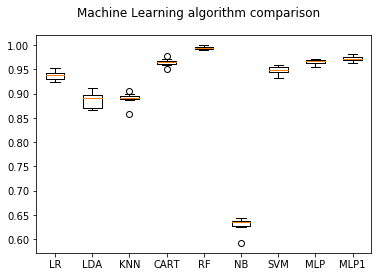

CPU times: user 48min 40s, sys: 19min 58s, total: 1h 8min 39s
Wall time: 27min


In [18]:
%%time
# filter all the warnings
import warnings
warnings.filterwarnings('ignore')

# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [19]:
!pip install np_utils
#import keras
#from keras import backend as K

from tensorflow.keras.models import Sequential
#from tensorflow.keras.np_utils import np_utils
#from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

#from keras.models import Sequential
#from keras.np_utils import np_utils
#from keras.layers.core import Dense, Activation, Dropout
import pandas as pd
import numpy as np
#trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal

#y_train = np_utils.to_categorical(trainLabelsGlobal) 
y_train = to_categorical(trainLabelsGlobal) 
X_train=trainDataGlobal


input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(100, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))





#model.add(Dense(30, input_dim=input_dim))
#model.add(Activation('relu'))
#model.add(Dropout(0.15))
#model.add(Dense(13))
#model.add(Activation('relu'))
#model.add(Dropout(0.15))
#model.add(Dense(nb_classes))
#model.add(Activation('softmax'))




# we'll use categorical xent for the loss, and RMSprop as the optimizer
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
model.compile(loss='categorical_crossentropy', optimizer='adam')

print("Training...")
history=model.fit(X_train, y_train, nb_epoch=20, batch_size=16, validation_split=0.1)


print("Generating test predictions...")
preds = model.predict_classes(testDataGlobal, verbose=0)

for i in range(len(preds)):
    print(testLabelsGlobal[i],":",preds[i]) 

print(accuracy_score(testLabelsGlobal, preds))

def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(preds, "keras-mlp.csv")

model.save_weights('WBC_model_wieghts.h5')
model.save('WBC_model_keras.h5')


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Training...
Train on 7168 samples, validate on 797 samples
Epoch 1/20
7168/7168 [==============================] - 2s 244us/sample - loss: 0.5868 - val_loss: 0.2460
Epoch 2/20
7168/7168 [==============================] - 1s 167us/sample - loss: 0.2101 - val_loss: 0.1650
Epoch 3/20
7168/7168 [==============================] - 1s 169us/sample - loss: 0.1250 - val_loss: 0.1323
Epoch 4/20
7168/7168 [==============================] - 1s 172us/sample - loss: 0.0998 - val_loss: 0.1029
Epoch 5/20
7168/7168 [==============================] - 1s 174us/sample - loss: 0.0639 - val_loss: 0.1069
Epoch 6/20
7168/7168 [==============================] - 1s 171us/sample - loss: 0.0475 - val_loss: 0.0927
Epoch 7/20
7168/7168 [==============================] - 1s 169us/sample - loss: 0.0462 - val_loss: 0.1018
Epoch 8/20
7168/7168 [====

3 : 3
1 : 1
3 : 3
2 : 2
2 : 2
1 : 1
0 : 0
2 : 2
0 : 0
0 : 0
3 : 3
0 : 0
2 : 2
1 : 1
1 : 1
0 : 0
2 : 2
1 : 1
3 : 3
1 : 1
3 : 3
2 : 2
3 : 3
2 : 2
0 : 0
1 : 1
2 : 2
2 : 2
2 : 2
1 : 1
2 : 2
1 : 1
2 : 2
1 : 1
3 : 3
1 : 1
0 : 0
2 : 2
2 : 2
1 : 1
2 : 2
3 : 3
0 : 0
3 : 3
1 : 1
3 : 3
3 : 3
0 : 0
1 : 1
1 : 1
2 : 2
2 : 2
1 : 1
1 : 1
1 : 1
2 : 2
0 : 0
0 : 0
2 : 2
0 : 3
0 : 0
3 : 3
1 : 1
2 : 2
1 : 1
3 : 3
0 : 0
1 : 1
0 : 0
3 : 3
1 : 1
0 : 0
2 : 2
3 : 3
2 : 2
1 : 1
0 : 0
1 : 1
1 : 1
3 : 3
3 : 3
1 : 1
2 : 2
1 : 1
0 : 0
0 : 0
3 : 3
3 : 3
1 : 1
2 : 2
2 : 2
0 : 0
1 : 1
3 : 3
3 : 3
2 : 2
0 : 0
1 : 1
1 : 1
2 : 2
3 : 3
2 : 2
3 : 3
1 : 3
0 : 0
3 : 0
3 : 3
3 : 3
0 : 0
0 : 0
2 : 2
1 : 1
3 : 3
2 : 2
1 : 1
3 : 3
3 : 3
2 : 2
1 : 1
2 : 2
0 : 0
3 : 3
2 : 2
1 : 1
1 : 1
3 : 3
2 : 2
0 : 0
3 : 3
2 : 2
2 : 2
2 : 2
2 : 2
3 : 3
2 : 2
2 : 2
2 : 2
1 : 1
0 : 0
0 : 0
1 : 1
3 : 3
2 : 2
2 : 2
2 : 2
2 : 2
0 : 0
0 : 0
1 : 1
3 : 3
2 : 2
1 : 3
0 : 0
2 : 2
1 : 1
0 : 0
1 : 1
3 : 3
1 : 1
3 : 3
0 : 0
3 : 3
0 : 3
0 : 0
0 : 0
3 : 3
2 : 

In [20]:
def get_data_for_prediction(img_file):
    """
    Load the data and labels from the given folder.
    """
    global_features = []
    y = []
    
    if img_file is not None:
        # Downsample the image to 120, 160, 3
        #img_file=skimage.transform.resize(arr=img_file, size=(240, 320, 3))
        img_file=np.array(Image.fromarray(img_file).resize(size=(64, 64)))
       # img_file = scipy.misc.imresize(arr=img_file, size=(64, 64, 3))
        #img_arr = np.asarray(img_file)
        #X.append(img_arr)
                    
        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(img_file)
        fv_haralick   = fd_haralick(img_file)
        fv_histogram  = fd_histogram(img_file)
                
        hog_features1 = np.array(hog1(img_file))
        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        #global_feature = np.hstack([ hog_features1])
        global_features.append(global_feature)
      
                
    global_features = np.asarray(global_features)
    
    return global_features


In [28]:

img = cv2.imread('esotest.bmp')

def WBC_classification(img):
    from tensorflow.keras.models import load_model
    import cv2
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    model = load_model('WBC_model_keras.h5')
   
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    model.load_weights('WBC_model_wieghts.h5')
    
    global_features=get_data_for_prediction(img)
    #print(global_features)
    
    from sklearn.externals import joblib
    scaler1 = joblib.load("scaler.save") 
    #print(scaler1.data_max_)
    
    #scale_min=scaler.data_min_
    #scale_max=scaler.data_max_
    #scaler = MinMaxScaler(feature_range=(0, 1))
    #X_std=(global_features-scale_min)/(scale_max-scale_min)
    #rescaled_features=X_std*(1-0)+0
    rescaled_features = scaler1.transform(global_features)
    #img = cv2.resize(img,(64,64))
    #img = np.reshape(img,[1,64,64,3])
    #print(rescaled_features)
    classes = model.predict_classes(rescaled_features)
    #if classes[0]==0:
    #    label="BASOPHIL"
    if classes[0]==0:
        label="EOSINOPHIL"
    elif classes[0]==1:
        label="LYMPHOCYTE"
    elif classes[0]==2:
        label="MONOCYTES"
    else:
        label="NEUTROPHIL"

    print(classes)
    #print (type(classes))
    return label
    
wbc_label=WBC_classification(img)
print("WBC TYPE:",wbc_label)


[3]
WBC TYPE: NEUTROPHIL


In [22]:
#Sliding Windows for Object Detection with Python
import cv2
import matplotlib.pyplot as plt
import numpy as np

# read the image and define the stepSize and window size 
# (width,height)
image = cv2.imread("cell.png") # your image path
tmp = image # for drawing a rectangle
stepSize = 50
(w_width, w_height) = (50, 50) # window size
for x in range(0, image.shape[1] - w_width , stepSize):
    for y in range(0, image.shape[0] - w_height, stepSize):
        window = image[x:x + w_width, y:y + w_height, :]
       
#classify content of the window with your classifier and  
# determine if the window includes an object (cell) or not

# draw window on image
cv2.rectangle(tmp, (x, y), (x + w_width, y + w_height), (255, 0, 0), 2) # draw rectangle on image
plt.imshow(np.array(tmp).astype('uint8'))
# show all windows
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'